In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/salaries.csv')

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Analist,65664,EUR,69120,NL,0,NL,M
1,2025,EN,FT,Data Analist,47652,EUR,50160,NL,0,NL,M
2,2025,EN,FT,Data Engineer,158113,USD,158113,US,0,US,M
3,2025,EN,FT,Data Engineer,87795,USD,87795,US,0,US,M
4,2025,EX,FT,Data Engineer,351410,USD,351410,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
105429,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
105430,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
105431,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
105432,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Analist,65664,EUR,69120,NL,0,NL,M
1,2025,EN,FT,Data Analist,47652,EUR,50160,NL,0,NL,M
2,2025,EN,FT,Data Engineer,158113,USD,158113,US,0,US,M
3,2025,EN,FT,Data Engineer,87795,USD,87795,US,0,US,M
4,2025,EX,FT,Data Engineer,351410,USD,351410,US,0,US,M


In [5]:
df.shape

(105434, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105434 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           105434 non-null  int64 
 1   experience_level    105434 non-null  object
 2   employment_type     105434 non-null  object
 3   job_title           105434 non-null  object
 4   salary              105434 non-null  int64 
 5   salary_currency     105434 non-null  object
 6   salary_in_usd       105434 non-null  int64 
 7   employee_residence  105434 non-null  object
 8   remote_ratio        105434 non-null  int64 
 9   company_location    105434 non-null  object
 10  company_size        105434 non-null  object
dtypes: int64(4), object(7)
memory usage: 8.8+ MB


In [7]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [8]:
df.duplicated().sum()

np.int64(52997)

In [9]:
df = df.drop_duplicates()

In [10]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,52437.000000,5.243700e+04,52437.000000,52437.000000
mean,2024.211816,1.610213e+05,151665.245971,24.742071
std,0.738199,2.931177e+05,77828.831204,42.982361
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,9.660000e+04,96600.000000,0.000000
50%,2024.000000,1.400000e+05,139475.000000,0.000000
75%,2025.000000,1.926000e+05,191000.000000,50.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


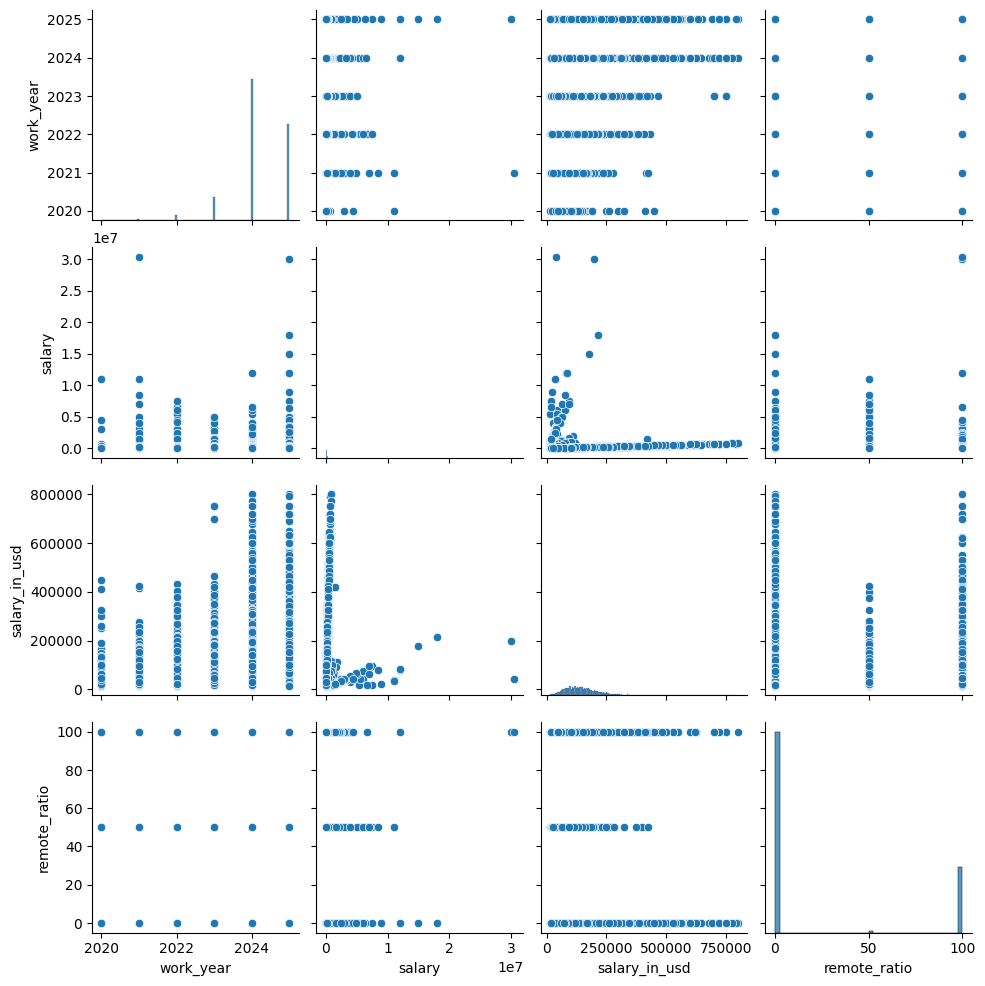

In [11]:
sns.pairplot(df)

<Axes: >

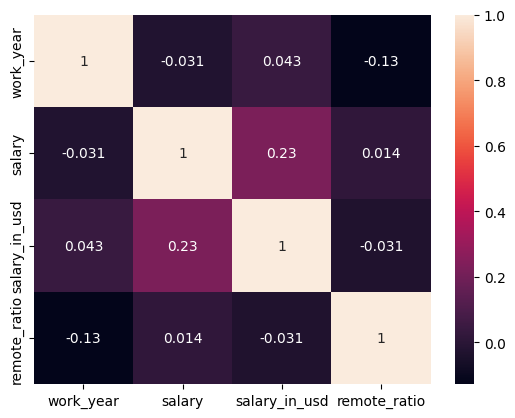

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52437 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           52437 non-null  int64 
 1   experience_level    52437 non-null  object
 2   employment_type     52437 non-null  object
 3   job_title           52437 non-null  object
 4   salary              52437 non-null  int64 
 5   salary_currency     52437 non-null  object
 6   salary_in_usd       52437 non-null  int64 
 7   employee_residence  52437 non-null  object
 8   remote_ratio        52437 non-null  int64 
 9   company_location    52437 non-null  object
 10  company_size        52437 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])

/tmp/ipython-input-1429466837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])
/tmp/ipython-input-1429466837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])
/tmp/ipython-input-1429466837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52437 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           52437 non-null  int64
 1   experience_level    52437 non-null  int64
 2   employment_type     52437 non-null  int64
 3   job_title           52437 non-null  int64
 4   salary              52437 non-null  int64
 5   salary_currency     52437 non-null  int64
 6   salary_in_usd       52437 non-null  int64
 7   employee_residence  52437 non-null  int64
 8   remote_ratio        52437 non-null  int64
 9   company_location    52437 non-null  int64
 10  company_size        52437 non-null  int64
dtypes: int64(11)
memory usage: 4.8 MB


In [16]:
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
39110,2024,3,2,164,130000,24,13,0,12,1
29769,2025,0,2,115,38724,24,43,0,43,1
31863,2025,2,2,28,138810,24,91,0,86,1
14081,2025,2,2,164,85300,24,91,100,86,1
86274,2024,3,2,115,149469,24,91,0,86,1
...,...,...,...,...,...,...,...,...,...,...
17214,2025,3,2,83,193000,24,91,0,86,1
90107,2024,1,2,66,237500,24,91,0,86,1
69550,2024,3,2,30,259000,24,91,100,86,1
937,2025,3,2,199,77400,8,32,0,32,1


In [19]:
y_train

,salary_in_usd
39110,130000
29769,38724
31863,138810
14081,85300
86274,149469
...,...
17214,193000
90107,237500
69550,259000
937,97974


In [20]:
X_test

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
89453,2024,3,2,115,255475,24,91,0,86,1
12627,2025,3,2,263,155000,24,91,0,86,1
25393,2025,2,2,30,101333,24,91,0,86,1
47168,2024,2,2,244,143100,24,91,0,86,1
90644,2024,3,2,141,122116,24,13,0,12,1
...,...,...,...,...,...,...,...,...,...,...
48169,2024,3,2,164,167537,24,91,0,86,1
18664,2025,0,2,333,89000,24,91,0,86,1
28746,2025,3,2,110,135000,24,91,0,86,1
95880,2023,2,2,164,199700,24,91,0,86,1


In [21]:
y_test

,salary_in_usd
89453,255475
12627,155000
25393,101333
47168,143100
90644,122116
...,...
48169,167537
18664,89000
28746,135000
95880,199700


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluate(model, X_train, X_test, y_train, y_test):
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  print('MSE train: ', mean_squared_error(y_train, y_pred_train))
  print('MSE test: ', mean_squared_error(y_test, y_pred_test))
  print('MAE train: ', mean_absolute_error(y_train, y_pred_train))
  print('MAE test: ', mean_absolute_error(y_test, y_pred_test))

In [24]:
from sklearn.linear_model import LinearRegression,Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:


evaluate(lr, X_train, X_test, y_train, y_test)

MSE train:  4824468804.844158
MSE test:  4746687552.621486
MAE train:  49967.184326613846
MAE test:  49867.90861119612


In [26]:
y_pred = lr.predict(X_test)

In [27]:
y_pred_train = lr.predict(X_train)

In [28]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.1996694871451984

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
ridge = Ridge()

In [31]:
ridge_param = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 3]
}

In [32]:
gridsearch = GridSearchCV(ridge, ridge_param, cv=5)

In [33]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 3]})

In [34]:
bestgrid = gridsearch.best_estimator_

In [35]:
bestgrid

Ridge(alpha=20)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
knn = KNeighborsRegressor()

In [38]:
knn_param = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [39]:
knn = KNeighborsRegressor()

In [40]:
knn = GridSearchCV(knn, knn_param, cv=5)

In [41]:
knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [42]:
knn_best = knn.best_estimator_

In [43]:
evaluate(knn_best,X_train, X_test, y_train, y_test)

MSE train:  85618255.32339269
MSE test:  229663228.05637395
MAE train:  2664.1040787623065
MAE test:  4992.135440503433


In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
de = DecisionTreeRegressor()

In [46]:
de_param = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}


In [47]:
de_grid = GridSearchCV(de, de_param, cv=5)

In [48]:
de_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [49]:
de_tree = de_grid.best_estimator_

In [50]:
de_tree

DecisionTreeRegressor(max_depth=10, min_samples_split=8)

In [51]:
pd.DataFrame({
    'features': X.columns,
    'importance': de_tree.feature_importances_
    }).sort_values('importance', ascending=False)


,features,importance
4,salary,9.708557e-01
5,salary_currency,1.577050e-02
6,employee_residence,7.638663e-03
9,company_size,3.049299e-03
8,company_location,2.485213e-03
0,work_year,9.251905e-05
3,job_title,7.805180e-05
2,employment_type,1.866236e-05
1,experience_level,1.101388e-05
7,remote_ratio,4.111215e-07


In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rd = RandomForestRegressor()

In [67]:
RF_param = {
    'n_estimators': [60],
    "max_depth": [8,12,],
    "min_samples_split": [ 10]
}

In [68]:
RF_search = GridSearchCV(rd, RF_param, cv=5)

In [69]:
RF_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 12], 'min_samples_split': [10],
                         'n_estimators': [60]})

In [70]:
best_RF = RF_search.best_estimator_

In [71]:
evaluate(best_RF, X_train, X_test, y_train, y_test)

MSE train:  25861552.156346973
MSE test:  72532159.55884689
MAE train:  371.51571340532587
MAE test:  593.6943399555886


In [72]:
import pickle
pickle.dump(best_RF, open('model.pkl', 'wb'))
